# Neural Network Classification of Spiral Data - Utkarsh Gaikwad

## Step 1 : Definition to create random spiral data with noise

In [16]:
def spiral_data(points,classes):
    import numpy as np
    x = np.zeros((points*classes,2))
    y = np.zeros(points*classes,dtype='uint8')
    for class_number in range(classes):
        ix = range(points*class_number,points*(class_number+1))
        r = np.linspace(0.0,1,points)
        t = np.linspace(class_number*4,(class_number+1)*4,points) + np.random.randn(points)*0.2
        x[ix]=np.c_[r*np.sin(t*2.5),r*np.cos(t*2.5)]
        y[ix]=class_number
    return x, y

In [17]:
x,y = spiral_data(1000,3)

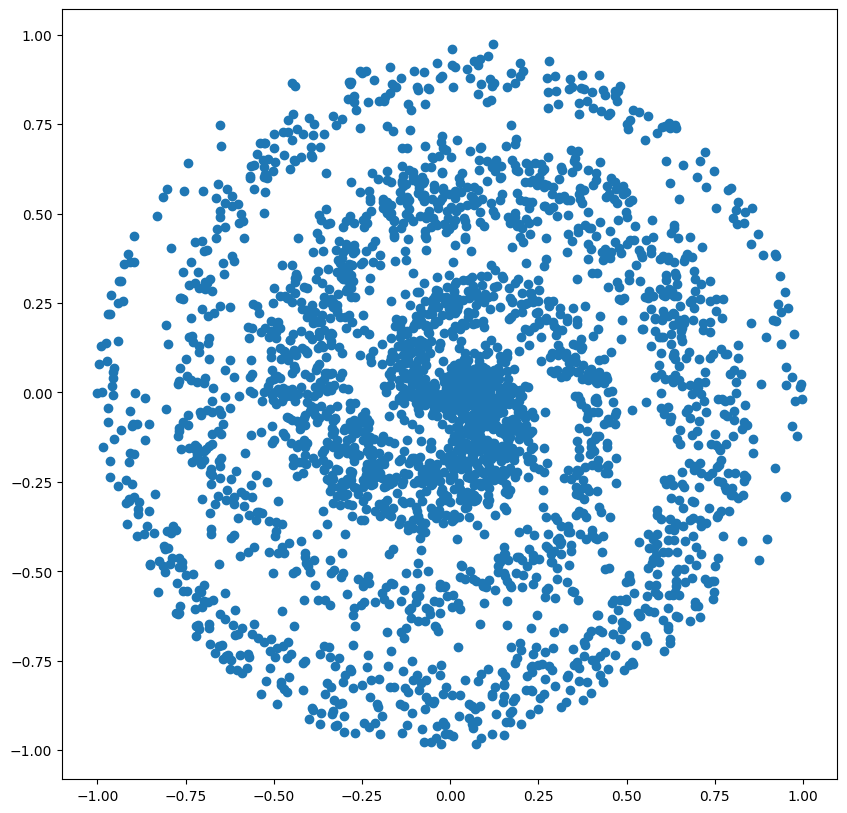

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.scatter(x[:,0],x[:,1])
plt.show()

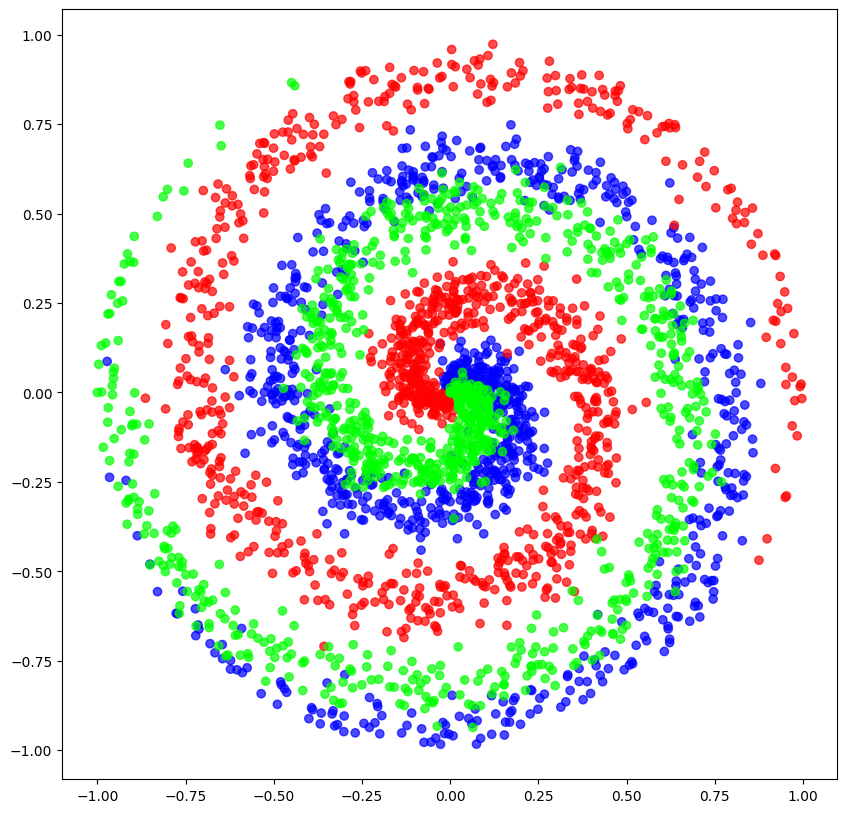

In [19]:
plt.figure(figsize=(10,10))
plt.scatter(x[:,0],x[:,1],c=y,cmap='brg',alpha=0.7)
plt.show()

## Define X and Y

In [20]:
import pandas as pd
X  = pd.DataFrame(x,columns=['x','y'])
Y = pd.DataFrame(y,columns=['Class'])

In [21]:
Ynew = pd.get_dummies(Y['Class'])
Ynew

,0,1,2
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
2995,0,0,1
2996,0,0,1
2997,0,0,1
2998,0,0,1


In [22]:
X.shape

(3000, 2)

In [23]:
Ynew.shape

(3000, 3)

## Train Test Split

In [24]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X,Ynew,test_size=0.2,random_state=21,stratify=Ynew)

## Create Neural Network

In [25]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.callbacks import EarlyStopping

es = EarlyStopping(patience=30)

nn = Sequential()
nn.add(Dense(256,input_dim=2,activation='relu'))
nn.add(Dropout(0.1))
nn.add(Dense(256,activation='relu'))
nn.add(Dropout(0.1))
nn.add(Dense(256,activation='relu'))
nn.add(Dropout(0.1))
nn.add(Dense(256,activation='relu'))
nn.add(Dropout(0.1))
nn.add(Dense(Ynew.shape[1],activation='softmax'))

nn.compile(loss='categorical_crossentropy',optimizer='adam',metrics='accuracy')
model = nn.fit(xtrain,ytrain,validation_data=[xtest,ytest],epochs=500,callbacks=es)

Epoch 1/500
75/75 [==============================] - 2s 7ms/step - loss: 1.0848 - accuracy: 0.3996 - val_loss: 1.0696 - val_accuracy: 0.4600
Epoch 2/500
75/75 [==============================] - 0s 4ms/step - loss: 1.0708 - accuracy: 0.4333 - val_loss: 1.0398 - val_accuracy: 0.4650
Epoch 3/500
75/75 [==============================] - 0s 5ms/step - loss: 0.9751 - accuracy: 0.4671 - val_loss: 0.8523 - val_accuracy: 0.5517
Epoch 4/500
75/75 [==============================] - 0s 5ms/step - loss: 0.7679 - accuracy: 0.6142 - val_loss: 0.5922 - val_accuracy: 0.7250
Epoch 5/500
75/75 [==============================] - 0s 4ms/step - loss: 0.5655 - accuracy: 0.7567 - val_loss: 0.4168 - val_accuracy: 0.8383
Epoch 6/500
75/75 [==============================] - 0s 5ms/step - loss: 0.5096 - accuracy: 0.7750 - val_loss: 0.3317 - val_accuracy: 0.8733
Epoch 7/500
75/75 [==============================] - 0s 4ms/step - loss: 0.3928 - accuracy: 0.8371 - val_loss: 0.3257 - val_accuracy: 0.8817
Epoch 8/500
7

## Testing Predictions

In [26]:
tr_prob=nn.predict(xtrain)
tr_class = tr_prob.argmax(axis=-1)

75/75 [==============================] - 0s 1ms/step


In [27]:
tr_class

array([1, 2, 2, ..., 1, 0, 2], dtype=int64)

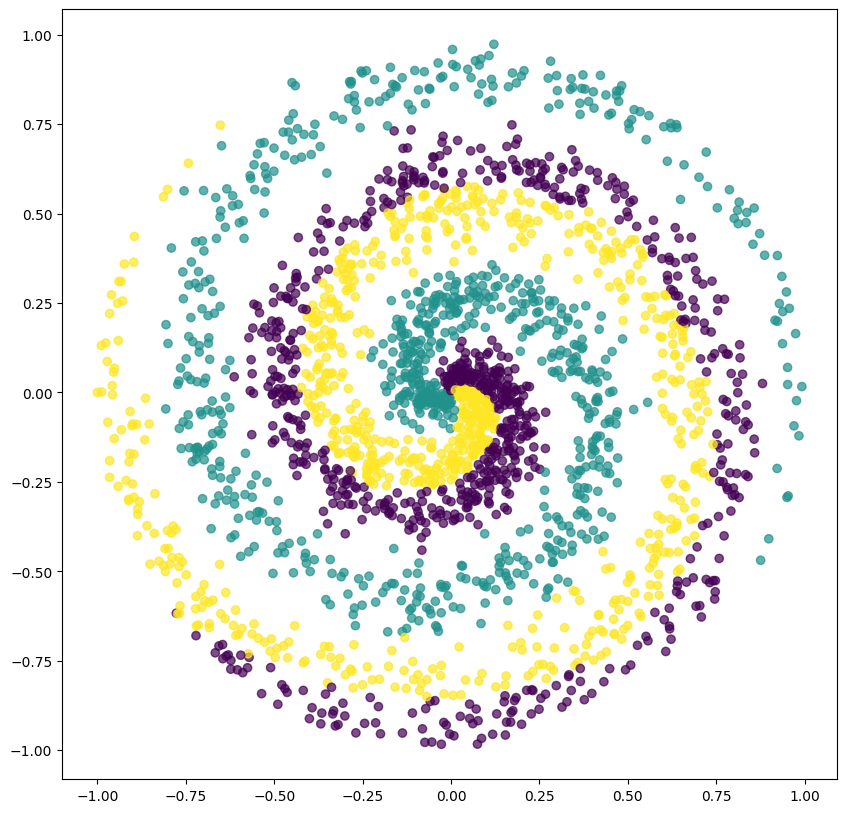

In [28]:
plt.figure(figsize=(10,10))
plt.scatter(xtrain['x'],xtrain['y'],alpha=0.7,c = tr_class)
plt.show()

In [29]:
ts_prob =nn.predict(xtest)
ts_class = ts_prob.argmax(axis=-1)

19/19 [==============================] - 0s 1ms/step


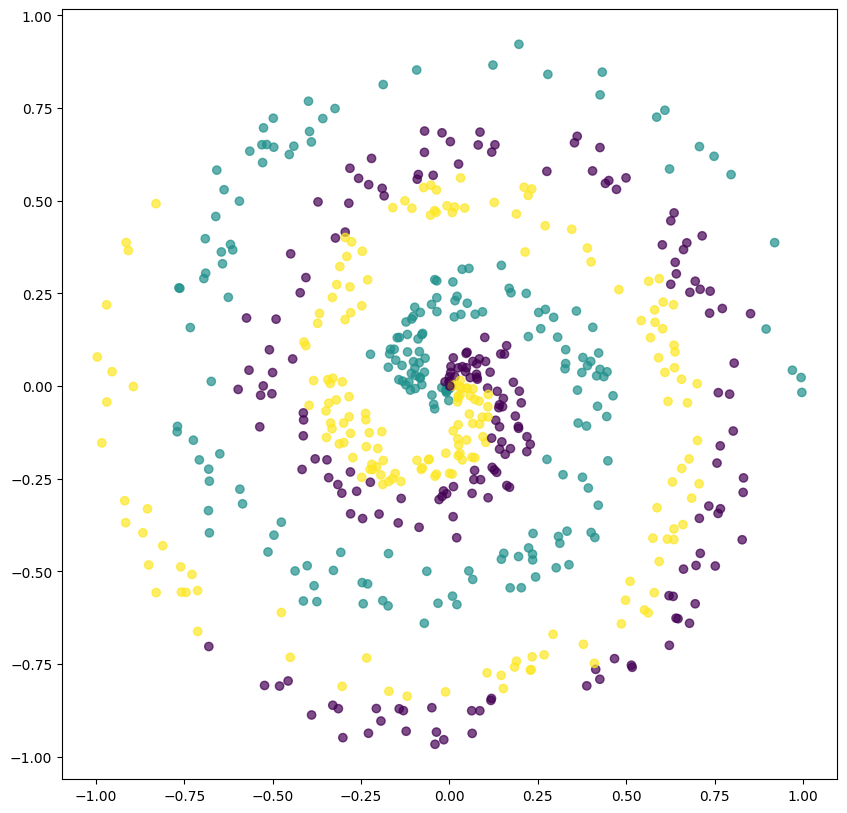

In [30]:
plt.figure(figsize=(10,10))
plt.scatter(xtest['x'],xtest['y'],alpha=0.7,c = ts_class)
plt.show()